# Exercises - GEO4902-02 - Data Assimilation

[Save as jupyter notebook, with your name in the filename, and upload on canvas]

# Exercise 02-01 -  Analyse the impact of the upper air data assimilation

In [60]:
# import packages
import xarray as xr
import math
import numpy as np
import cartopy as cy
from matplotlib import pyplot as plt
from cmcrameri import cm

#### Fill in the dates and hours for the exercise

In [61]:
year =  '2024'
day  =  '20'
month = '09'

hour_1  ='00'
hour_2  ='03'

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_det_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_det_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)

In [74]:
forecast_1

<xarray.Dataset> Size: 224GB
Dimensions:                                                                      (
                                                                                  time: 67,
                                                                                  mean_sea_level: 1,
                                                                                  surface: 1,
                                                                                  pressure: 13,
                                                                                  height_above_msl: 1,
                                                                                  ...
                                                                                  adiabatic_condensation_level: 1,
                                                                                  maximum_wind_level: 1,
                                                                                  tropopause: 1,
                                                                                  top_of_atmosphere: 1,
                                                                                  x: 739,
                                                                                  y: 949)
Coordinates: (12/27)
  * time                                                                         (time) datetime64[ns] 536B ...
  * mean_sea_level                                                               (mean_sea_level) int16 2B ...
  * surface                                                                      (surface) int16 2B ...
  * pressure                                                                     (pressure) float32 52B ...
  * height_above_msl                                                             (height_above_msl) float32 4B ...
  * height0                                                                      (height0) float32 4B ...
    ...                                                                           ...
  * tropopause                                                                   (tropopause) int16 2B ...
  * top_of_atmosphere                                                            (top_of_atmosphere) int16 2B ...
  * x                                                                            (x) float32 3kB ...
  * y                                                                            (y) float32 4kB ...
    longitude                                                                    (y, x) float64 6MB ...
    latitude                                                                     (y, x) float64 6MB ...
Data variables: (12/233)
    forecast_reference_time                                                      datetime64[ns] 8B ...
    p0                                                                           float64 8B ...
    ap                                                                           (hybrid) float64 520B ...
    b                                                                            (hybrid) float64 520B ...
    projection_lambert                                                           int32 4B ...
    integral_of_toa_net_downward_shortwave_flux_wrt_time_assuming_clear_sky      (time, top_of_atmosphere, y, x) float32 188MB ...
    ...                                                                           ...
    SFX_FMV                                                                      (time, y, x) float32 188MB ...
    SFX_CD                                                                       (time, y, x) float32 188MB ...
    SFX_CH                                                                       (time, y, x) float32 188MB ...
    SFX_CE                                                                       (time, y, x) float32 188MB ...
    SFX_Z0                                                                       (time, y, x) float32 188MB ...
    SFX_Z0H 

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [63]:
def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    x=int(x)
    y=int(y)
   
    return (x,y)

In [64]:
[y_loc,x_loc] = findindex(forecast_1['latitude'],forecast_1['longitude'],78.24,15.46) # For example for Longyearbyen

/tmp/ipykernel_908382/4093572236.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)
/tmp/ipykernel_908382/4093572236.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)


#### For example temperature forecasts at a specific model level

In [65]:
mlevel=64
tml_point_forecast_1 = forecast_1['air_temperature_ml'].isel(hybrid=mlevel, y = y_loc, x=x_loc)
tml_point_forecast_2 = forecast_2['air_temperature_ml'].isel(hybrid=mlevel, y = y_loc, x=x_loc)

Text(0.5, 1.0, 'Longyearbyen Temperature Forecast')

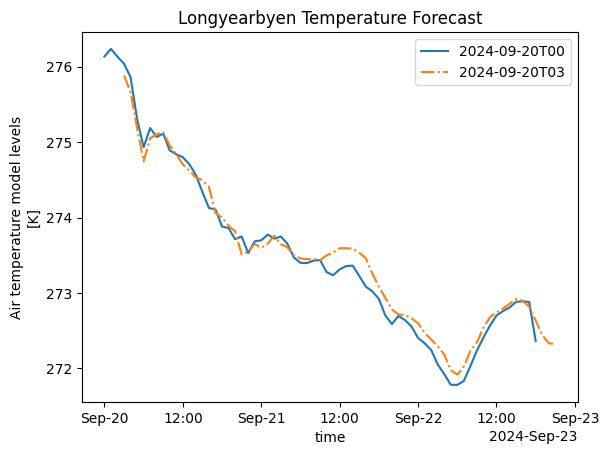

In [66]:
tml_point_forecast_1.plot.line(x='time', linestyle='-', label=(np.datetime_as_string(tml_point_forecast_1.time.isel(time=0), unit='h')))
tml_point_forecast_2.plot.line(x='time', linestyle='-.', label=(np.datetime_as_string(tml_point_forecast_2.time.isel(time=0), unit='h')))
plt.legend()
plt.title("Longyearbyen Temperature Forecast")

2 additional variables relevant to a weather forecast. 

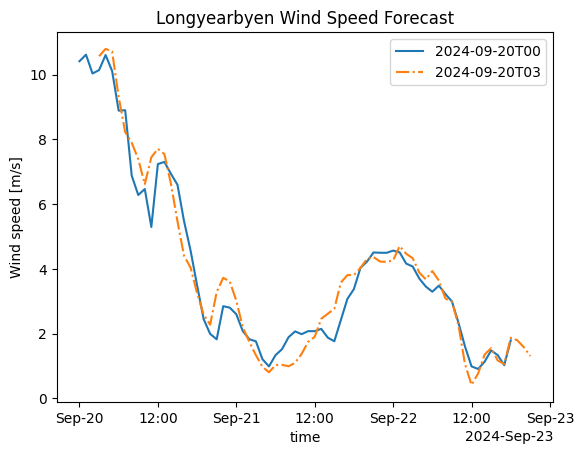

In [72]:
# wind
wind_speed_point_forecast_1 = forecast_1['wind_speed'].isel(height7=0, y = y_loc, x=x_loc)
wind_speed_point_forecast_2 = forecast_2['wind_speed'].isel(height7=0, y = y_loc, x=x_loc)

wind_speed_point_forecast_1.plot.line(x='time', linestyle='-', label=(np.datetime_as_string(wind_speed_point_forecast_1.time.isel(time=0), unit='h')))
wind_speed_point_forecast_2.plot.line(x='time', linestyle='-.', label=(np.datetime_as_string(wind_speed_point_forecast_2.time.isel(time=0), unit='h')))
plt.legend()
plt.title("Longyearbyen Wind Speed Forecast");

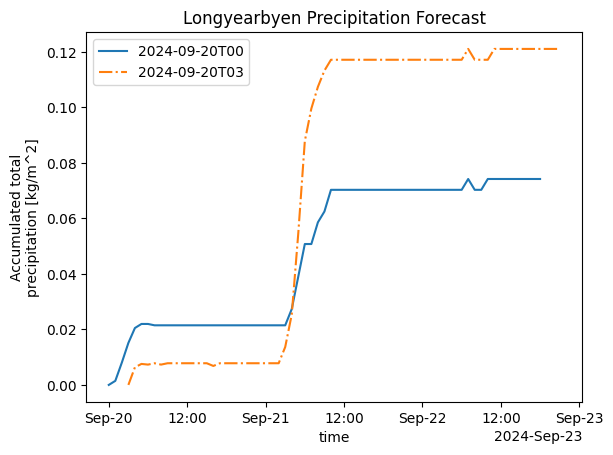

In [68]:
# precip
acc_precip_point_forecast_1 = forecast_1['precipitation_amount_acc'].isel(height0=0, y = y_loc, x=x_loc)
acc_precip_point_forecast_2 = forecast_2['precipitation_amount_acc'].isel(height0=0, y = y_loc, x=x_loc)

acc_precip_point_forecast_1.plot.line(x='time', linestyle='-', label=(np.datetime_as_string(acc_precip_point_forecast_1.time.isel(time=0), unit='h')))
acc_precip_point_forecast_2.plot.line(x='time', linestyle='-.', label=(np.datetime_as_string(acc_precip_point_forecast_2.time.isel(time=0), unit='h')))
plt.legend()
plt.title("Longyearbyen Precipitation Forecast");

### Plot forecast on a map

In this case the background $x_B$ is the previously initialized forecast and $x_A$ is the newer one with new assimilated data.

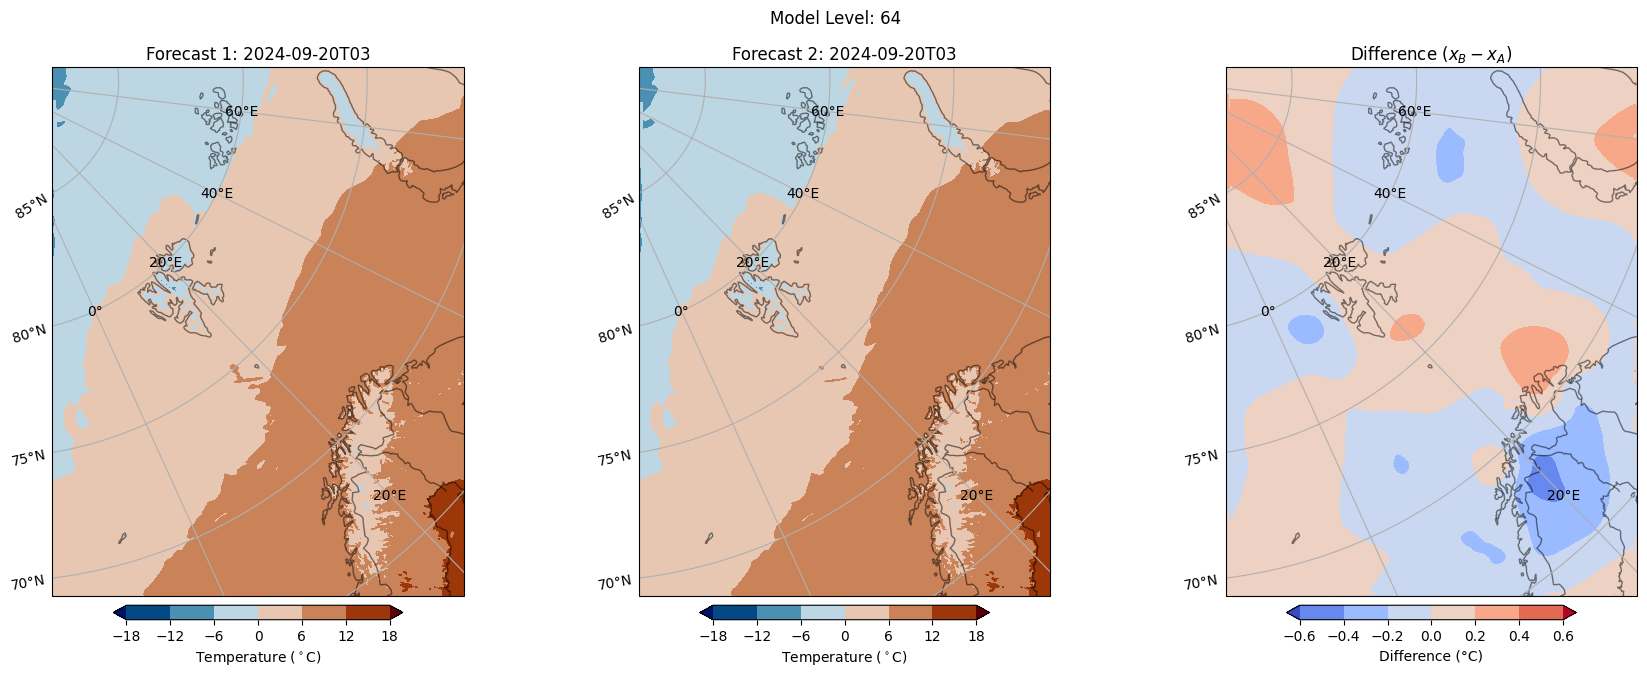

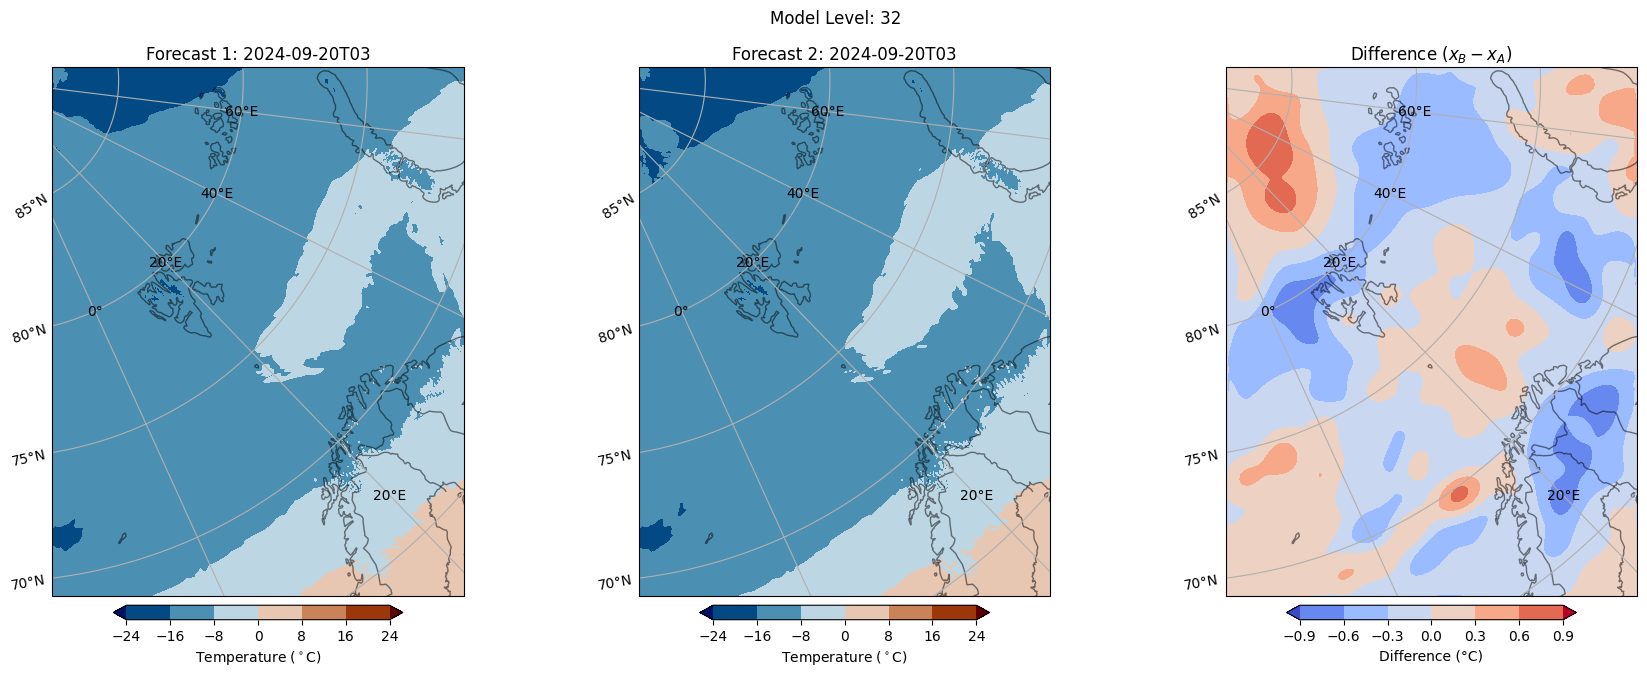

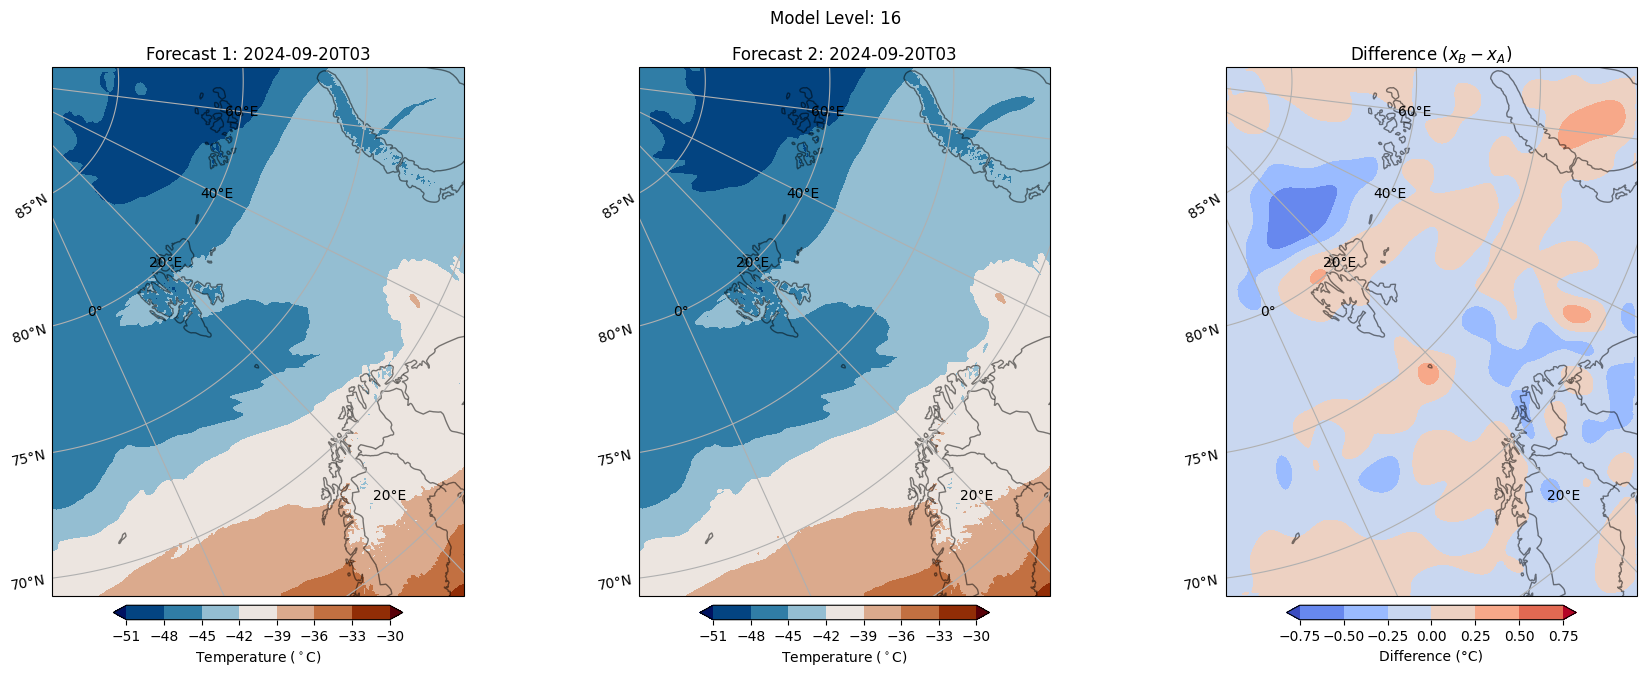

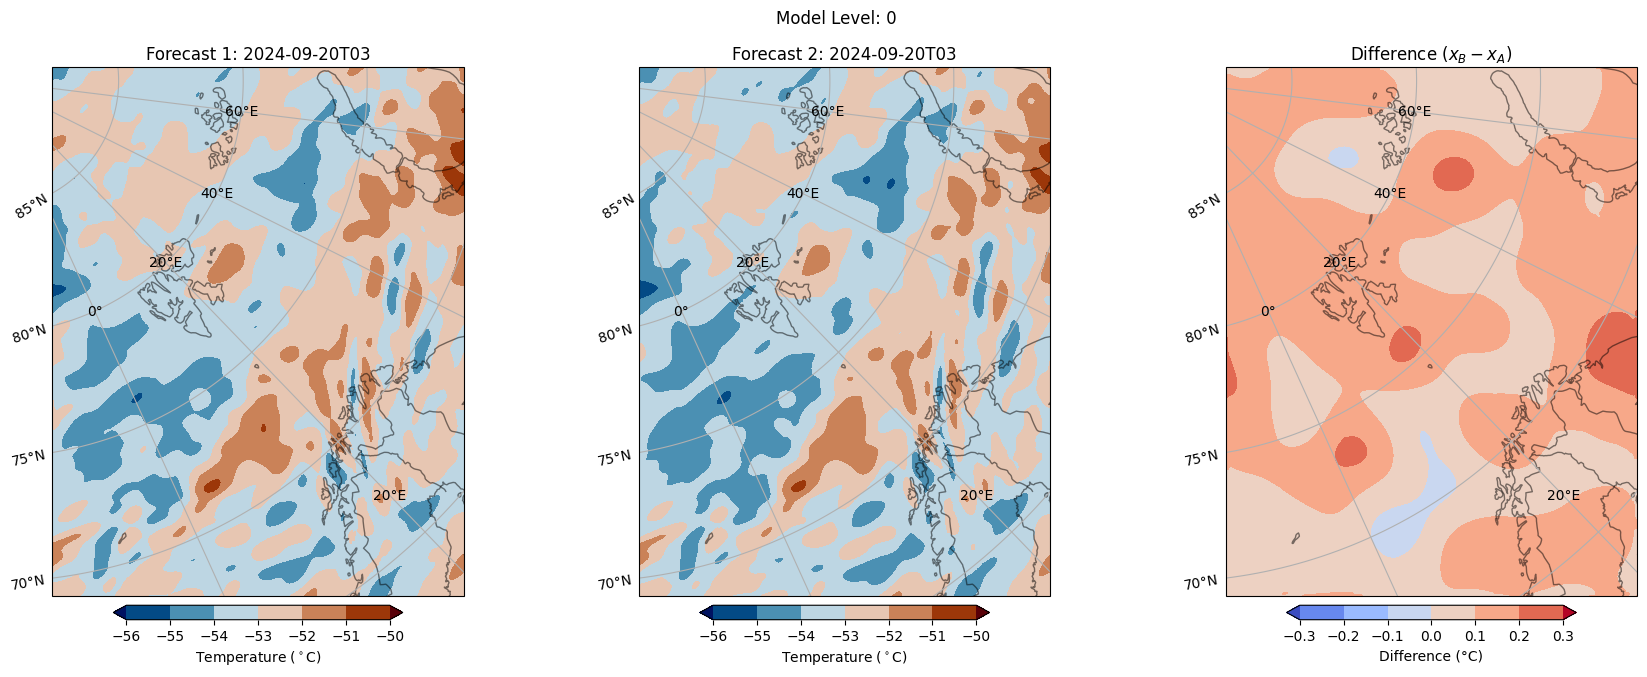

In [69]:
mlevels= [64, 32, 16, 0]
timestep_1=3
timestep_2=0

projection = cy.crs.LambertConformal(central_longitude =forecast_1.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =forecast_1.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = forecast_1.projection_lambert.standard_parallel)

for mlevel in mlevels:
    fig, axes = plt.subplots(1, 3, subplot_kw={'projection': projection}, figsize=[18, 7.2])

    # Plot cosmetics (applies to all axes)
    for ax in axes:
        ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
        ax.add_feature(cy.feature.BORDERS, alpha=0.5)
        gl = ax.gridlines(draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False

    # Plot forecast_1
    (forecast_1['air_temperature_ml'].isel(time=timestep_1, hybrid=mlevel) - 273.15).plot.contourf(
        ax=axes[0], 
        x='longitude', 
        y='latitude', 
        cmap=cm.vik, 
        extend='both', 
        transform=cy.crs.PlateCarree(),
        cbar_kwargs={'orientation':'horizontal', 'label':'Temperature ($^\circ$C)', 'shrink':0.5, 'pad':0.015}
    )
    axes[0].set_title(f"Forecast 1: {np.datetime_as_string(forecast_1.time.isel(time=timestep_1), unit='h')}")

    # Plot forecast_2 for the same timestep
    (forecast_2['air_temperature_ml'].isel(time=timestep_2, hybrid=mlevel) - 273.15).plot.contourf(
        ax=axes[1], 
        x='longitude', 
        y='latitude', 
        cmap=cm.vik, 
        extend='both', 
        transform=cy.crs.PlateCarree(),
        cbar_kwargs={'orientation':'horizontal', 'label':'Temperature ($^\circ$C)', 'shrink':0.5, 'pad':0.015}
    )
    axes[1].set_title(f"Forecast 2: {np.datetime_as_string(forecast_2.time.isel(time=timestep_2), unit='h')}")

    # Plot the difference (x_B - x_A) for the same timestep
    difference = (forecast_1['air_temperature_ml'].isel(time=timestep_1, hybrid=mlevel) -
                forecast_2['air_temperature_ml'].isel(time=timestep_2, hybrid=mlevel))

    (difference).plot.contourf(
        ax=axes[2], 
        x='longitude', 
        y='latitude', 
        cmap='coolwarm', 
        extend='both', 
        transform=cy.crs.PlateCarree(),
        cbar_kwargs={'orientation':'horizontal', 'label':'Difference (°C)', 'shrink':0.5, 'pad':0.015}
    )
    axes[2].set_title("Difference ($x_B - x_A$)")
    plt.suptitle(f'Model Level: {mlevel}')
    plt.tight_layout()
    plt.show()

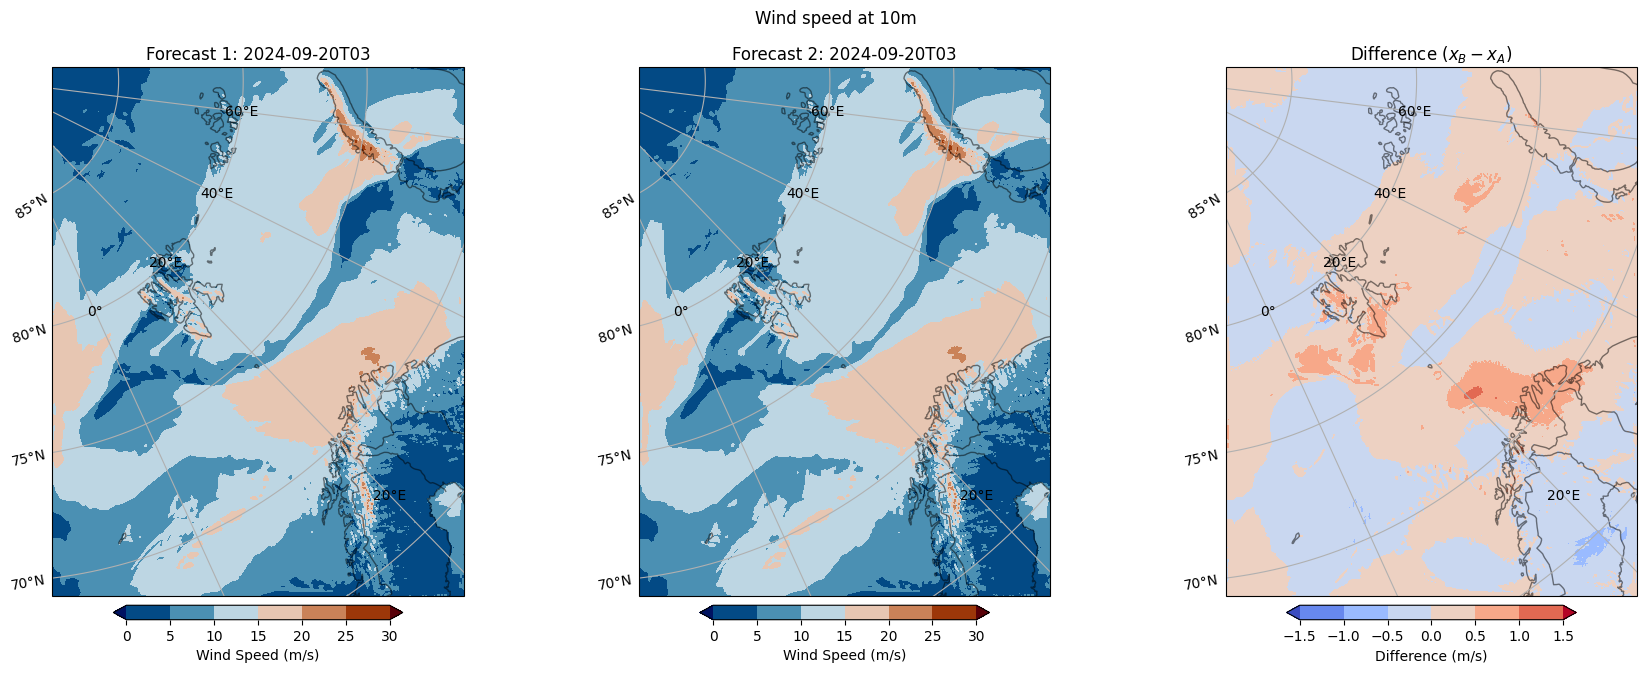

In [70]:
mlevels= 0
timestep_1=3
timestep_2=0

projection = cy.crs.LambertConformal(central_longitude =forecast_1.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =forecast_1.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = forecast_1.projection_lambert.standard_parallel)


fig, axes = plt.subplots(1, 3, subplot_kw={'projection': projection}, figsize=[18, 7.2])

# Plot cosmetics (applies to all axes)
for ax in axes:
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

# Plot forecast_1
(forecast_1['wind_speed'].isel(time=timestep_1, height7=mlevel)).plot.contourf(
    ax=axes[0], 
    x='longitude', 
    y='latitude', 
    cmap=cm.vik, 
    extend='both', 
    transform=cy.crs.PlateCarree(),
    cbar_kwargs={'orientation':'horizontal', 'label':'Wind Speed (m/s)', 'shrink':0.5, 'pad':0.015}
)
axes[0].set_title(f"Forecast 1: {np.datetime_as_string(forecast_1.time.isel(time=timestep_1), unit='h')}")

# Plot forecast_2 for the same timestep
(forecast_2['wind_speed'].isel(time=timestep_2, height7=mlevel)).plot.contourf(
    ax=axes[1], 
    x='longitude', 
    y='latitude', 
    cmap=cm.vik, 
    extend='both', 
    transform=cy.crs.PlateCarree(),
    cbar_kwargs={'orientation':'horizontal', 'label':'Wind Speed (m/s)', 'shrink':0.5, 'pad':0.015}
)
axes[1].set_title(f"Forecast 2: {np.datetime_as_string(forecast_2.time.isel(time=timestep_2), unit='h')}")

# Plot the difference (x_B - x_A) for the same timestep
difference = (forecast_1['wind_speed'].isel(time=timestep_1, height7=mlevel) -
            forecast_2['wind_speed'].isel(time=timestep_2, height7=mlevel))

(difference).plot.contourf(
    ax=axes[2], 
    x='longitude', 
    y='latitude', 
    cmap='coolwarm', 
    extend='both', 
    transform=cy.crs.PlateCarree(),
    cbar_kwargs={'orientation':'horizontal', 'label':'Difference (m/s)', 'shrink':0.5, 'pad':0.015}
)
axes[2].set_title("Difference ($x_B - x_A$)")
plt.suptitle(f'Wind speed at 10m')
plt.tight_layout()
plt.show()

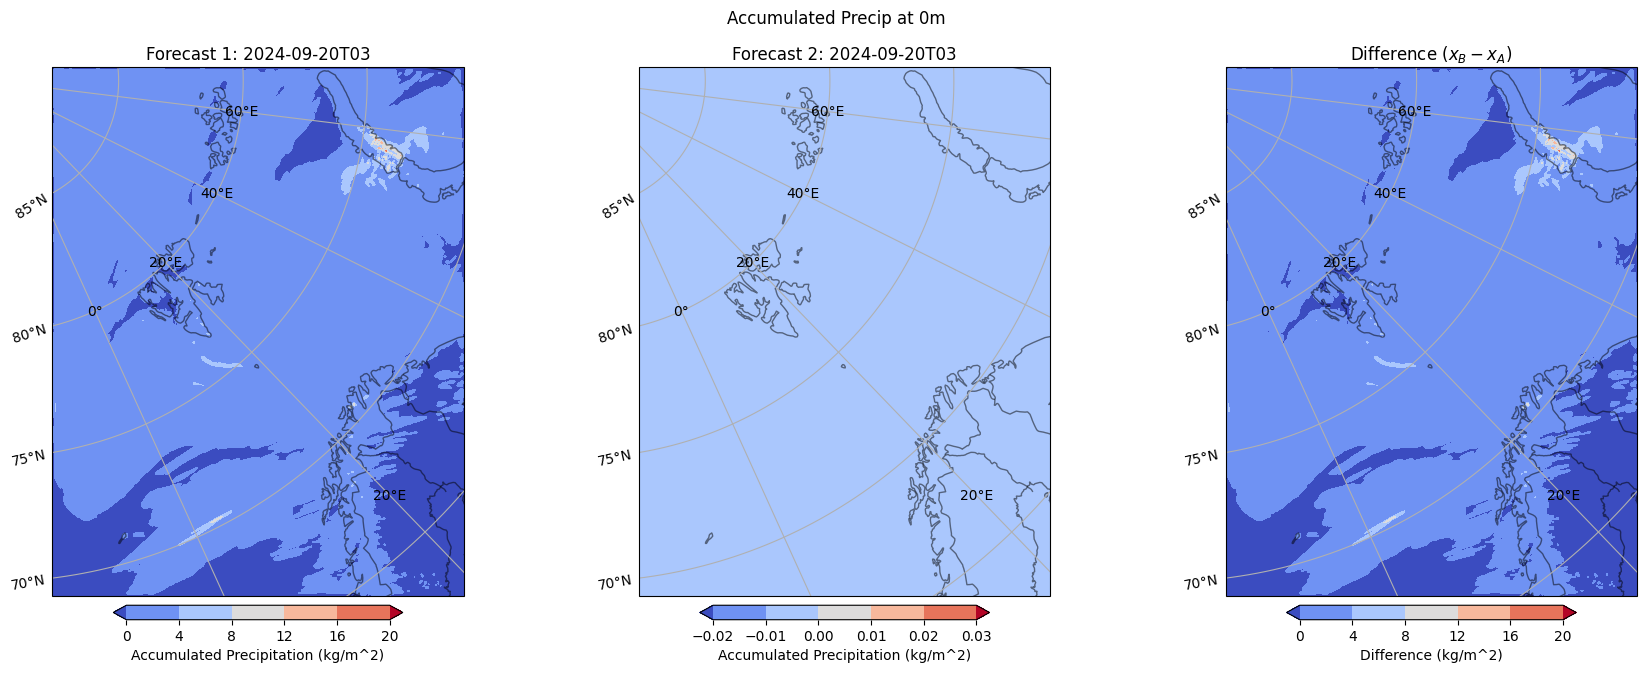

In [185]:
mlevels= 1
timestep_1=3
timestep_2=0

projection = cy.crs.LambertConformal(central_longitude =forecast_1.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =forecast_1.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = forecast_1.projection_lambert.standard_parallel)


fig, axes = plt.subplots(1, 3, subplot_kw={'projection': projection}, figsize=[18, 7.2])

# Plot cosmetics (applies to all axes)
for ax in axes:
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

# Plot forecast_1
(forecast_1['precipitation_amount_acc'].isel(time=timestep_1, height0=mlevel)).plot.contourf(
    ax=axes[0], 
    x='longitude', 
    y='latitude', 
    cmap='coolwarm', 
    extend='both',
    levels=np.arange(0, 24, 4),
    transform=cy.crs.PlateCarree(),
    cbar_kwargs={'orientation':'horizontal', 'label':'Accumulated Precipitation (kg/m^2)', 'shrink':0.5, 'pad':0.015}
)
axes[0].set_title(f"Forecast 1: {np.datetime_as_string(forecast_1.time.isel(time=timestep_1), unit='h')}")


# Plot forecast_2 for the same timestep
(forecast_2['precipitation_amount_acc'].isel(time=timestep_2, height0=mlevel)).plot.contourf(
    ax=axes[1], 
    x='longitude', 
    y='latitude', 
    cmap='coolwarm', 
    extend='both',
    levels=np.arange(-0.02, 0.04, 0.01),
    transform=cy.crs.PlateCarree(),
    cbar_kwargs={'orientation':'horizontal', 'label':'Accumulated Precipitation (kg/m^2)', 'shrink':0.5, 'pad':0.015}
)
axes[1].set_title(f"Forecast 2: {np.datetime_as_string(forecast_2.time.isel(time=timestep_2), unit='h')}")

# Plot the difference (x_B - x_A) for the same timestep
difference = (forecast_1['precipitation_amount_acc'].isel(time=timestep_1, height0=mlevel) -
            forecast_2['precipitation_amount_acc'].isel(time=timestep_2, height0=mlevel))

(difference).plot.contourf(
    ax=axes[2], 
    x='longitude', 
    y='latitude', 
    cmap='coolwarm', 
    extend='both', 
    levels=np.arange(0, 24, 4),
    transform=cy.crs.PlateCarree(),
    cbar_kwargs={'orientation':'horizontal', 'label':'Difference (kg/m^2)', 'shrink':0.5, 'pad':0.015}
)
axes[2].set_title("Difference ($x_B - x_A$)")

axes[0].set_xlim(axes[1].get_xlim())
axes[0].set_ylim(axes[1].get_ylim())

axes[2].set_xlim(axes[1].get_xlim())
axes[2].set_ylim(axes[1].get_ylim())
plt.suptitle(f'Accumulated Precip at 0m')
plt.tight_layout()
plt.show()

NOTE: Accumulated precipitation is 0 in forecast 2